In [1]:
from math import *

from MITgcmutils import rdmds

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

%matplotlib inline

from netCDF4 import Dataset


import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import sys

import seaborn as sns

lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import MetricsPythonTools as mpt




In [2]:
paths = ['/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF']


runs = ['run03',
      'run17',
      'run11',
      'run12',
      'run14',
      'run15',
      'run16',
      'run18',
      'run19',
      'run04',
      'run05',
      'run06',
      'run07']

labels = ['Base', 
          'kv=1E-7',
          'kv=1E-4',
          'kv=1E-3',
          'N=3.9E-3',
          'N=6.3E-3',
          'N=3.0E-3',
          'f=7.68E-5',
          'f=4.84E-5',
          'kv_can=1E-7, kv_out=1E-3',
          'kv_can=1E-7, kv_out=1E-4',
          'kv_can=1E-5, kv_out=1E-3',
          'kv_can=1E-5, kv_out=1E-4']

nx = 360
ny = 360
nz = 90
  
Grid1, GridOut1, State1,StateOut1,Ptracers1, PtracersOut1 = mpt.getDatasets(paths[0], runs[0])

rc = GridOut1.variables['RC']
xc = rout.getField(Grid1, 'XC') # x coords tracer cells
yc = rout.getField(Grid1, 'YC') # y coords tracer cells

drF = GridOut1.variables['drF'] # vertical distance between faces
dxG = rout.getField(Grid1,'dxG')
dxF = rout.getField(Grid1,'dxF')
dyF = rout.getField(Grid1,'dyF')
MaskCan = rout.getMask(Grid1,'HFacC')
hFacCCan = rout.getField(Grid1,'HFacC')
rACan = rout.getField(Grid1,'rA')
drFCan=GridOut1.variables['drF']
time = StateOut1.variables['T']
nt = len(time)
nttd = 10
print('Finished reading grid variables')

  

Finished reading grid variables


In [3]:
def calculate_avg_transport(expPath, run, n0, nf):
    Grid1, GridOut1, State1,StateOut1,Ptracers1, PtracersOut1 = mpt.getDatasets(expPath, run)
    
    
    #FluxTR01 = ('%s/%s/FluxTR01Glob.nc' %(expPath, run))
    #FluxTR02 = ('%s/%s/FluxTR02Glob.nc' %(expPath, run))
    #FluxTR03 = ('%s/%s/FluxTR03Glob.nc' %(expPath, run))
 

    #Transect definitions (indices x,y,z,t)
  
    CS = [0,359,227,227,0,29,n0,nf]

    LID = [120,240,227,267,29,29,n0,nf]

    velfile = State1

  
    #f = FluxTR01
    #tr = '1'
    #trstr = 'Tr1'

    keyw = 'W'
    keyv = 'V'
    keyu = 'U'

    W = rout.getField(velfile,keyw)
    UT = rout.getField(velfile,keyu)
    VT = rout.getField(velfile,keyv)
    U,V = rout.unstagger(UT,VT)
    
    V_CSa = mpt.slice_TRAC(V,CS[0],CS[1],CS[2],CS[3],CS[4],CS[5],CS[6],CS[7])

    W_LIDa = mpt.slice_TRAC(W,LID[0],LID[1],LID[2],LID[3],LID[4],LID[5],LID[6],LID[7])


    V_CSarea = mpt.slice_area(dxF,drFCan,rACan,hFacCCan,CS[0],CS[1],CS[2],CS[3],CS[4],CS[5])
    W_LIDarea = mpt.slice_area(dxF,drFCan,rACan,hFacCCan,LID[0],LID[1],LID[2],LID[3],LID[4],LID[5])


    V_CS = np.nansum(np.nanmean(V_CSa*V_CSarea,axis=0),axis=0)
    W_LID = np.nansum(np.nanmean(W_LIDa*W_LIDarea),axis=0)
    
    return(V_CS,W_LID)


## Advective Phase

0
1
2
3
4
5
6
7
8
9
10
11
12


IndexError: list index out of range

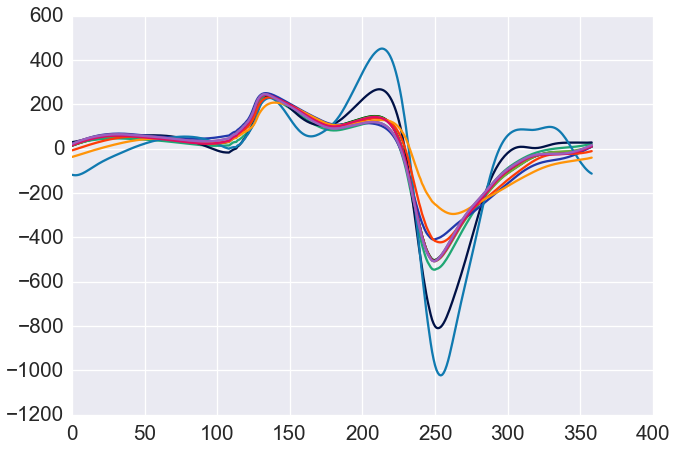

In [4]:
VertWater = np.empty(len(runs))
CSWater = np.empty(len(runs))

colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)
fig, ax1 = plt.subplots(1,1)

ii = 0

for path, rr in zip(paths,runs):
    
    CS, VertWater[ii] = calculate_avg_transport(path, rr, 10, nt)
    CSWater[ii] = np.nansum(CS)
    print(ii)
    ax1.plot(CS, label = labels[ii])
    ii = ii+1
plt.show()


In [5]:
fvector = np.array([9.66E-5,9.66E-5,9.66E-5,
                    9.66E-5,9.66E-5,9.66E-5,
                    9.66E-5,7.68E-5,4.84E-5,
                    9.66E-5,9.66E-5,9.66E-5,9.66E-5])

Nvector = np.array([5.5E-3,5.5E-3,5.5E-3,
                    5.5E-3,3.9E-3,6.3E-3,
                    3.0E-3,5.5E-3,5.5E-3,
                    5.5E-3,5.5E-3,5.5E-3,5.5E-3])

Kv = np.array([1E-5,1E-7,1E-4,
               1E-3,1E-5,1E-5,
               1E-5,1E-5,1E-5,
               1E-7,1E-7,1E-5,1E-5,])

Hs = 152.5 # m
W = 8300.0 # m
T = 3600.0 # s timescale for diffusion
L = 6400.0 # m Canyon length
A = L*W # Scale for canyon area i just made up. About size of high concentration region
Z = 10.0 # m scale for depth of blob of HCW
U = 0.18 # m/s shelf current

Pe = (L*Kv)/(U*(Z*Z))

Bu = (Nvector*Hs)/(fvector*W)

Xi = (Kv*Nvector)/((fvector**2)*(L**2)) 


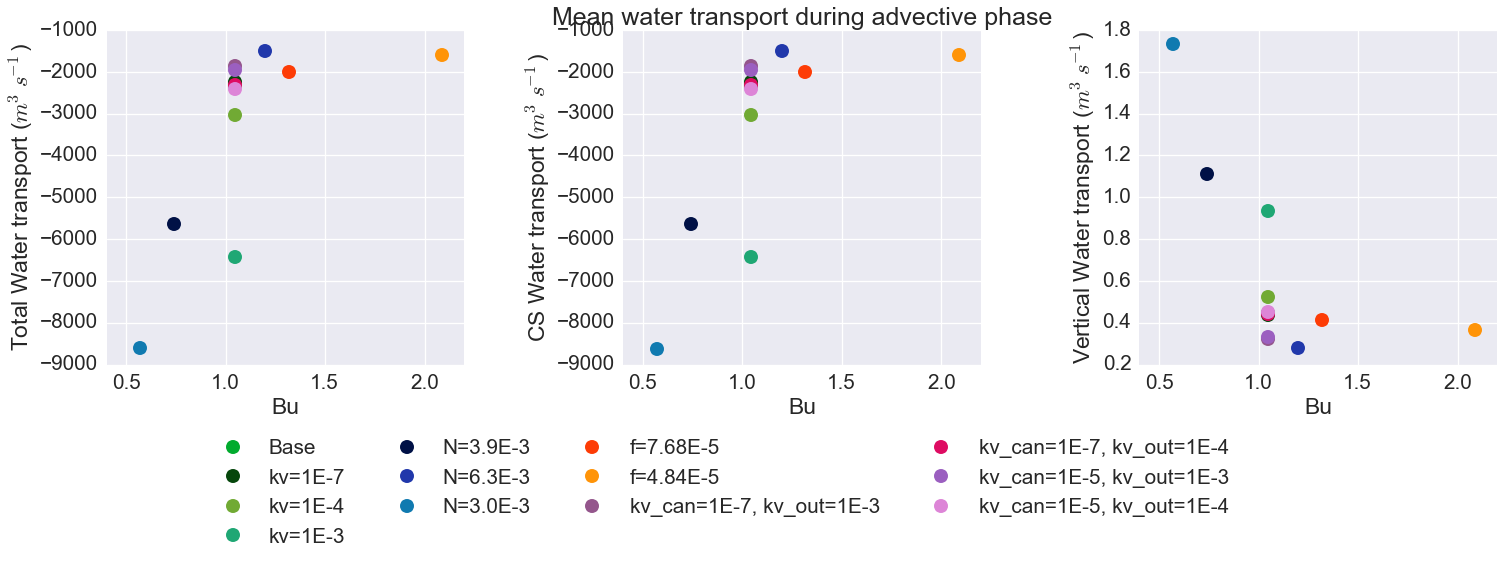

In [8]:
colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(21, 6))



for ii in range(len(runs)):
    ax1.plot(Bu[ii],VertWater[ii]+CSWater[ii],'o',markersize=14,label=labels[ii])
    ax2.plot(Bu[ii],CSWater[ii],'o',markersize=14,label=labels[ii])
    ax3.plot(Bu[ii],VertWater[ii],'o',markersize=14,label=labels[ii])
    
    


ax1.set_aspect('auto')

ax2.set_title('Mean water transport during advective phase')
    
ax1.set_ylabel('Total Water transport ($m^3s^{-1}$)')
ax2.set_ylabel('CS Water transport ($m^3s^{-1}$)')
ax3.set_ylabel('Vertical Water transport ($m^3s^{-1}$)')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='lower right', bbox_to_anchor=(0.3,-0.6), ncol=4)    

plt.tight_layout()

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/WaterTransportAdv_vs_Bu.pdf', format='pdf', dpi=1000, bbox_inches='tight')


## Time dependent phase

0
1
2
3
4
5
6
7
8
9
10
11
12


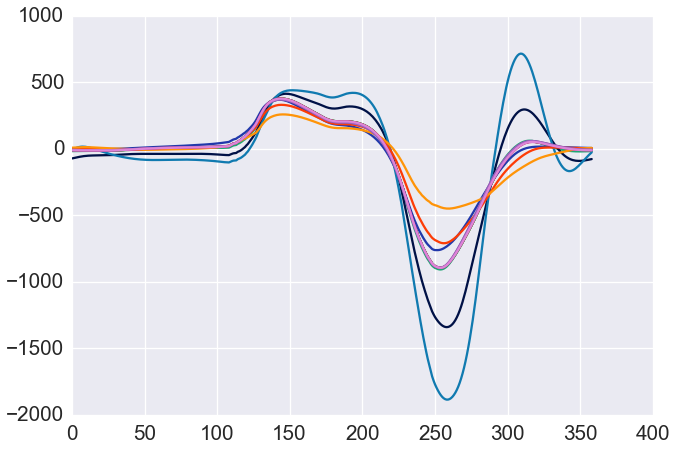

In [11]:
VertWaterTD = np.empty(len(runs))
CSWaterTD = np.empty(len(runs))

colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)
fig, ax1 = plt.subplots(1,1)

ii = 0

for path, rr in zip(paths,runs):
    
    CS, VertWaterTD[ii] = calculate_avg_transport(path, rr, 0, 10)
    CSWaterTD[ii] = np.nansum(CS)
    print(ii)
    
    ax1.plot(CS, label = labels[ii])
    ii = ii+1
    
plt.show()
ax1.legend(loc=0)


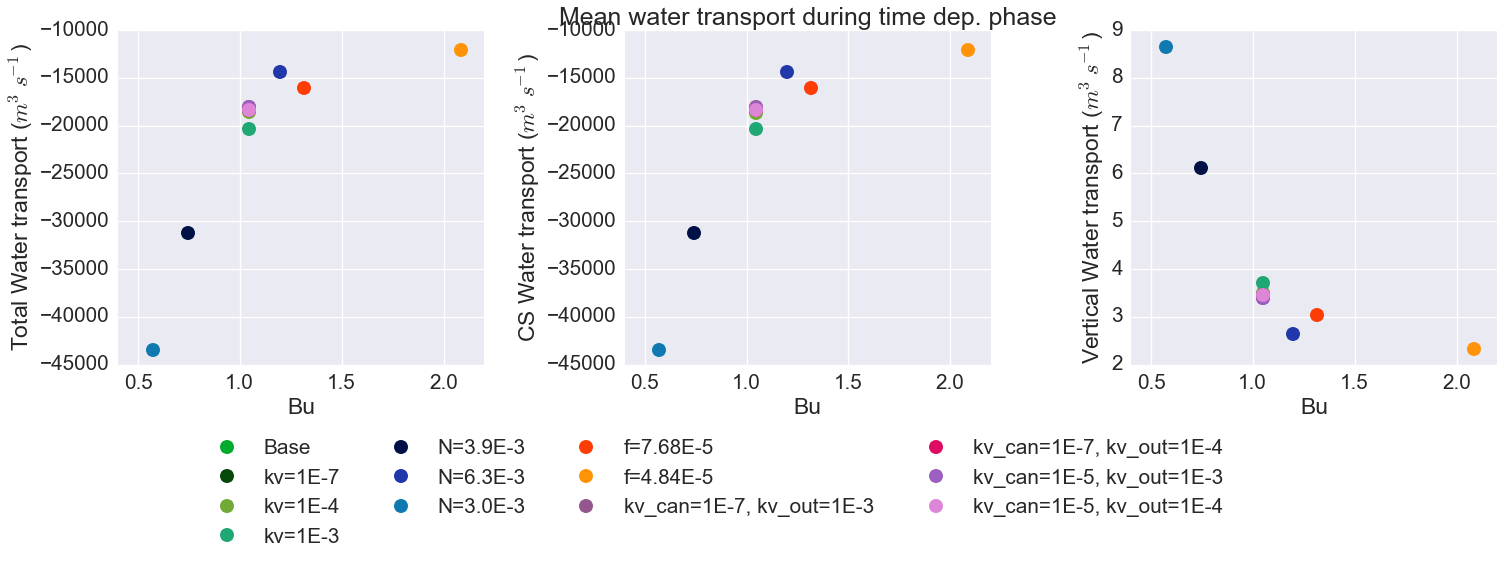

In [12]:
colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]


color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.6)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(21, 6))



for ii in range(len(runs)):
    ax1.plot(Bu[ii],VertWaterTD[ii]+CSWaterTD[ii],'o',markersize=14,label=labels[ii])
    ax2.plot(Bu[ii],CSWaterTD[ii],'o',markersize=14,label=labels[ii])
    ax3.plot(Bu[ii],VertWaterTD[ii],'o',markersize=14,label=labels[ii])
    
    


ax1.set_aspect('auto')

ax2.set_title('Mean water transport during time dep. phase')
    
ax1.set_ylabel('Total Water transport ($m^3s^{-1}$)')
ax2.set_ylabel('CS Water transport ($m^3s^{-1}$)')
ax3.set_ylabel('Vertical Water transport ($m^3s^{-1}$)')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='lower right', bbox_to_anchor=(0.3,-0.6), ncol=4)    

plt.tight_layout()

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/WaterTransportTimeDep_vs_Bu.pdf', format='pdf', dpi=1000, bbox_inches='tight')
